# Python Challenge 

## Question: Analyzing Monthly Sales Trends

### Background:
You have been provided with two CSV files: `orders.csv` containing order information and `order_details.csv` containing details of each order. The `orders.csv` file includes columns order_id and order_date, while `order_details.csv` includes order_id, amount, and category. Your task is to analyze monthly sales trends for the "Electronics" category.

### Goal:
Aggregate the monthly total sales (amount) for the "Electronics" category and plot a line graph to visualize trends


### Tasks:
- Load the data from `orders.csv` and `order_details.csv` into pandas DataFrames.
- Convert the order_date column to datetime format and set it as the index of both DataFrames. Combine the two dataframes.
- Subset the data to include only orders and order details related to the "Electronics" category.
- Aggregate the monthly total sales (amount) for the "Electronics" category.
- Plot a line graph to visualize the monthly sales trends for the "Electronics" category (code provided).

### Expected Output:
A line plot showing the monthly total sales trends for the "Electronics" category.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
order_details = pd.read_csv('data/order_details_clean.csv')
orders = pd.read_csv('data/orders_clean.csv')

In [3]:
order_details.dtypes

order_id         object
amount          float64
profit          float64
quantity          int64
category         object
sub-category     object
dtype: object

In [4]:
orders.dtypes

order_id          object
order_date        object
customer_name     object
state             object
city              object
month            float64
year             float64
dtype: object

In [5]:
orders.head()

,order_id,order_date,customer_name,state,city,month,year
0,B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,4.0,2018.0
1,B-25602,2018-04-01,Pearl,Maharashtra,Pune,4.0,2018.0
2,B-25603,2018-04-03,Jahan,Madhya Pradesh,Bhopal,4.0,2018.0
3,B-25604,2018-04-03,Divsha,Rajasthan,Jaipur,4.0,2018.0
4,B-25605,2018-04-05,Kasheen,West Bengal,Kolkata,4.0,2018.0


In [16]:
orders.shape

(500, 6)

In [6]:
order_details.head()

,order_id,amount,profit,quantity,category,sub-category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [17]:
order_details.shape

(1500, 5)

In [7]:
#Here i am converting the order_date to datetime
orders['order_date'] = pd.to_datetime(orders['order_date'])


In [9]:
#Here  I am setting order_id as the index to both the dataframes  for further combining the data
order_details.set_index('order_id', inplace=True)
orders.set_index('order_id', inplace=True)


In [13]:
#Here i am combining the 2 data frames, naming it combinedOrders
combinedOrders =  orders.merge(order_details, left_index=True, right_index= True)

In [15]:
combinedOrders.head()

,order_date,customer_name,state,city,month,year,amount,profit,quantity,category,sub-category
order_id,,,,,,,,,,,
B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,4.0,2018.0,1275.0,-1148.0,7,Furniture,Bookcases
B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,4.0,2018.0,66.0,-12.0,5,Clothing,Stole
B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,4.0,2018.0,8.0,-2.0,3,Clothing,Hankerchief
B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,4.0,2018.0,80.0,-56.0,4,Electronics,Electronic Games
B-25602,2018-04-01,Pearl,Maharashtra,Pune,4.0,2018.0,168.0,-111.0,2,Electronics,Phones


In [21]:
electronicOrders = combinedOrders [combinedOrders['category'] == 'Electronics']

In [22]:
electronicOrders

,order_date,customer_name,state,city,month,year,amount,profit,quantity,category,sub-category
order_id,,,,,,,,,,,
B-25601,2018-04-01,Bharat,Gujarat,Ahmedabad,4.0,2018.0,80.0,-56.0,4,Electronics,Electronic Games
B-25602,2018-04-01,Pearl,Maharashtra,Pune,4.0,2018.0,168.0,-111.0,2,Electronics,Phones
B-25602,2018-04-01,Pearl,Maharashtra,Pune,4.0,2018.0,424.0,-272.0,5,Electronics,Phones
B-25602,2018-04-01,Pearl,Maharashtra,Pune,4.0,2018.0,2617.0,1151.0,4,Electronics,Phones
B-25608,2018-04-08,Aarushi,Tamil Nadu,Chennai,4.0,2018.0,856.0,385.0,6,Electronics,Printers
...,...,...,...,...,...,...,...,...,...,...,...
B-26096,2019-03-28,Atharv,West Bengal,Kolkata,3.0,2019.0,451.0,25.0,3,Electronics,Phones
B-26097,2019-03-28,Vini,Karnataka,Bangalore,3.0,2019.0,663.0,-212.0,5,Electronics,Printers
B-26097,2019-03-28,Vini,Karnataka,Bangalore,3.0,2019.0,671.0,-309.0,5,Electronics,Electronic Games


In [18]:
combinedOrders.shape

(1500, 11)

In [26]:
electronicOrders['order_date'] = electronicOrders['order_date'].dt.month

/var/folders/j5/gkrrbxf15_d87ky2rm4hncpw0000gp/T/ipykernel_58551/3218538344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electronicOrders['order_date'] = electronicOrders['order_date'].dt.month


In [27]:
monthly_sales = electronicOrders.groupby('order_date')['amount'].sum()

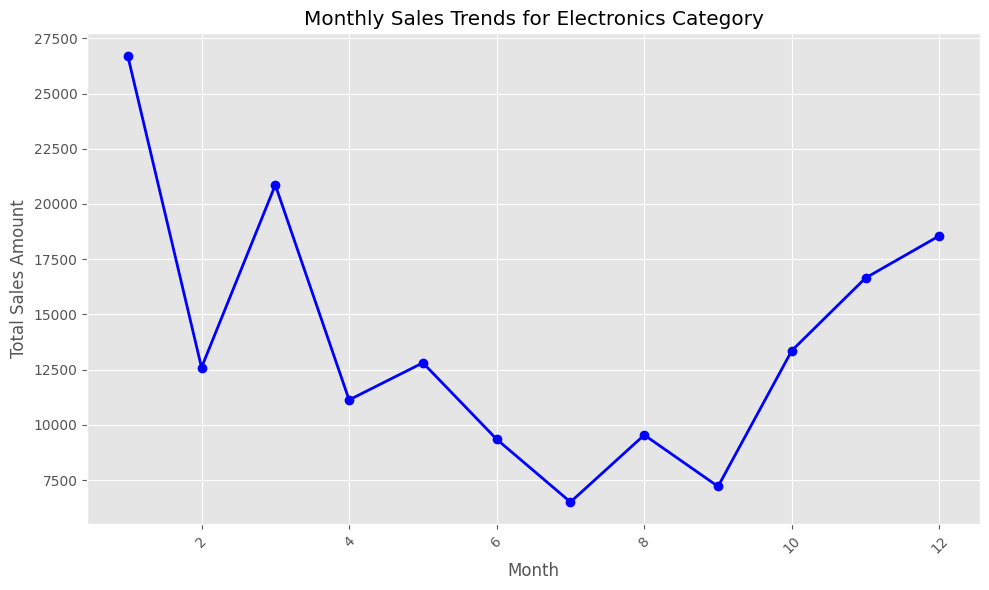

In [28]:
# !! The prepared dataframe should be called monthly_sales
# Plotting
plt.figure(figsize=(10, 6))
monthly_sales.plot(marker='o', linestyle='-', color='b', linewidth=2)
plt.title('Monthly Sales Trends for Electronics Category')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()